# Sistemas Inteligentes

## Exercício Computacional 2 - Classificação

Preencha todas as células adequadamente e responda todas as perguntas de forma completa e elaborada.

### Identificação do Aluno

#### Nome Completo

Lucas Eduardo De Mieri

#### RA

11201723007

### Instruções

Treine e teste um classificador à sua escolha utilizando a base de dados **Olivetti Faces** (veja as referências).

Faça um caso com com *k-Fold* e um caso de forma direta, ou seja, utilizando o *train_test_split*.

Exiba a acurácia e a *Confusion Matrix*, então discuta sobre o desempenho do classificador para os dois casos.

Entre as células de códigos, insira células de tipo *Markdown* para fornecer explicações sobre os passos realizados; não insira apenas códigos "soltos" sem explicação.

Dica: desta vez, estamos lidando com uma quantidade relativamente grande de classes, então pode ser interessante exibir a *Confusion Matrix* utilizando escala de cinza para representar os valores de cada célula da matriz; para fazer isso, prefira utilizar a função **imshow** com o mapa de cores (argumento **cmap**) do tipo **'Greys'**.

**EXTRA**: tente fazer um caso com *Bootstrap* em vez de *k-Fold*, então comente sobre o método e os resultados.

## Desenvolvimento

In [32]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
x=fetch_olivetti_faces().data
y=fetch_olivetti_faces().target
print(x.shape)
print(y.shape)

(400, 4096)
(400,)


KFold ira dividir os dados em K-1 conjuntos(folds), de modo a evitar que os conjuntos tenham distribuições desbalanceadas em relação ao total dos dados.

In [38]:
kf=KFold(shuffle=True, random_state=101)
for train_index, test_index in kf.split(x):
    x_train, x_test, y_train, y_test= x[train_index], x[test_index], y[train_index], y[test_index]

/Users/LucasEduardoDeMieri/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/LucasEduardoDeMieri/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.9849624060150376


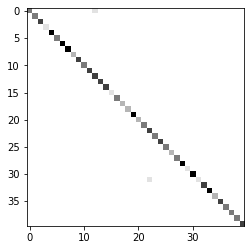

In [39]:
LDA=LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
y_pred_LDA=LDA.predict(x_test)
print(accuracy_score(y_test, y_pred_LDA))
plt.imshow(confusion_matrix(y_test, y_pred_LDA), cmap='Greys')

o train test split corre o risco de fazer uso de uma amostra que não representa adequadamente a distribuição do conjunto de teste.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101 )

/Users/LucasEduardoDeMieri/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.99


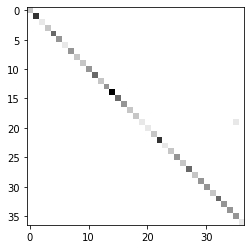

In [37]:
LDA=LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
y_pred_LDA=LDA.predict(x_test)
print(accuracy_score(y_test, y_pred_LDA))
plt.imshow(confusion_matrix(y_test, y_pred_LDA), cmap='Greys')

## Questões

### 1. O classificador escolhido por você obteve um bom desempenho em sua opinião? Por que?

Ambos os classificadores obteram resultados próximos de 0.99, sendo assim é razoável supor que os dados tem um comportamento linear que pode ser descrito pelo LDA

### 2. Além da acurácia e da matriz de confusão, quais métricas e recursos poderiam ser utilizados para avaliar o seu classificador?

Poderia ser utilizada a metrica da precisão 

p=pv/(pv+pf)

### 3. O seu classificador obteve um desempenho notoriamente superior ou inferior para alguma das classes? Para qual(is)? Por que você acredita que isso ocorreu?

As regiões entre 10 e 20 do train_test_split são muito menos concentradas do que em comparação co kfold, o que pode evidênciar uma distribuição não otimizada  ou que não reflete corretamente o conjunto de dados, por parte do train_test_split

### 4. O que se poderia fazer para melhorar o desempenho de seu classificador?

testar novos parametros e procurar por outliers 

### 5. Se fosse utilizada apenas metade da base de dados deste exercício em vez de ela toda, mas mantendo as proporções para os dados de treinamento e teste, os resultados sofreriam alguma mudança significativa? Se sim, quais e em qual intensidade?

O método de train_test_split não sofreria alteração, entretanto o kfold seria prejudicado testando k/2 -1 vezes, em comparação ao original

### 6. Para quê servem métodos como k-Fold e Bootstrap? Você observou alguma mudança significativa por conta de sua utilização? Se sim, qual? E a quê se deve isso?

ambos os métodos podem ser usados como tratamento  para tentar evitar que o modelo sofra overfiting ou underfiting, a utilização do k-fold garante que os termos setejam balanceadamente distribuidos ao longo da matriz de confusão, enquanto métodos mais simples como o train_test_split tem um fator de aleatoriedade que pode concetrar termos em regiões do matriz

## Referências

[Scikit-Learn - Datasets - Olivetti Faces](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

[Scikit-Learn - Resample (Bootstrap)](http://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)